In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
df=pd.read_csv("final_nvmp.csv")

In [3]:
#preview the dataset

df.head()

,Station Code,Name of Monitoring Location,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,...,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability
0,26,"BORE WELL AT KANURUPANCHAYAT, VIJAYAWADA",ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,...,3,11,21,1356,1480,0.38,0.44,BDL,BDL,Not Drinkable
1,1513,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,...,4,13,20,1260,1328,0.32,0.36,BDL,BDL,Not Drinkable
2,1514,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,...,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable
3,1516,"BOREWELL OF NAVLOKGARDENS, NELLORE TOWN",ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,...,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable
4,1517,"BOREWELL NEAR TUNGBHADRA RIVER, MAMIDALAPADU (...",ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,...,9,53,53,1349,3846,0.5,1.2,BDL,BDL,Not Drinkable


In [4]:
#Seeing all the numeric columns

[col for col in df.columns if df[col].dtype!='O']

['Station Code']

In [5]:
df['Name of Monitoring Location'].value_counts()

Name of Monitoring Location
MANDI GOBINDGARH, PUNJAB                                         2
TUBE WELL AT BISHALGARH                                          2
HAMIRA VILLAGE, PUNJAB                                           2
LEATHER COMPLEX, JALANDHAR,PUNJAB                                2
NANGAL, PUNJAB                                                   2
                                                                ..
HAND PUMP AT TAHLIWALBAZAR                                       1
HAND PUMP AT KEYLONG                                             1
BOREWELL NEAR UNA?HAROLI BRIDGE  INDUSTRIAL AREAJEETPUR BEHRI    1
HANDPUMP NEAR SATSANGBHAWAN  VILLAGE MUGLA                       1
GROUND WATER AT SHYAMPUR BUDGE BUDGE                             1
Name: count, Length: 1111, dtype: int64

In [6]:
# Extract the source information from the full string into a new column

source_pattern = r'\b(HAND\s?PUMP|BORE\s?WELL|TUBE\s?WELL|GROUND\s?WATER|OPEN\s?WELL|INDUSTRIAL\s?AREA|\bWELL\b)\b'


df['Source'] = df['Name of Monitoring Location'].str.extract(source_pattern, flags=re.IGNORECASE)

In [7]:
#Remove spaces from the string stored

df['Source'] = df['Source'].str.replace(r'\s+', '')


In [8]:
# Get the count of different sources 

df['Source'].value_counts()

Source
WELL               207
GROUND WATER       178
BOREWELL           159
TUBE WELL           82
HAND PUMP           73
BORE WELL           63
HANDPUMP            18
TUBEWELL            18
INDUSTRIAL AREA     17
OPENWELL            10
OPEN WELL            8
GROUNDWATER          4
Name: count, dtype: int64

In [9]:
df['Source'].isnull().sum()


282

In [10]:
# Replace BDL values with 0 and ? with null 

df.replace(['BDL','?'],[0,pd.NA],inplace=True)

In [11]:
# Get the count of different attributes

df['State Name'].value_counts()

State Name
RAJASTHAN            100
ODISHA                89
GUJARAT               84
BIHAR                 70
WEST BENGAL           68
ASSAM                 66
TRIPURA               55
UTTAR PRADESH         53
MADHYA PRADESH        49
HIMACHAL PRADESH      48
DELHI                 45
PUNJAB                43
TELANGANA             42
LAKSHADWEEP           42
MAHARASHTRA           39
KERALA                35
ANDHRA PRADESH        33
MIZORAM               24
PUDUCHERRY            22
TAMIL NADU            21
MEGHALAYA             13
HARYANA               13
JAMMU AND KASHMIR     13
DAMAN AND DIU         12
NAGALAND              10
GOA                    9
MANIPUR                7
CHHATTISGARH           6
CHANDIGARH             4
JHARKHAND              3
KARNATAKA              1
Name: count, dtype: int64

In [12]:
df['BOD_Min'].value_counts()

BOD_Min
0      408
1.1     65
1.2     30
1.4     26
2.2     21
2.4     21
2.3     20
2       18
1.6     18
1.8     17
2.5     16
1.5     15
1.3     12
2.6      8
3.2      8
2.1      8
5        6
2.8      6
3        5
3.4      4
1.9      4
1.7      4
4.4      3
4.2      2
2.7      2
6        2
3.5      1
1        1
5.6      1
4.8      1
3.6      1
269      1
18       1
4.6      1
5.8      1
7.2      1
Name: count, dtype: int64

In [13]:
# Drop the attribute Name of Monitoring Location as it is already replaced by source 

df.drop(columns=['Name of Monitoring Location'],axis=1,inplace=True)

In [14]:
# Get the total count of null values in different attributes

df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                      119
Temp_Max                      119
pH_Min                          9
pH_Max                         15
Conductivity_Min               53
Conductivity_Max               53
BOD_Min                       360
DOB_Max                       360
Nitrate?N + Nitrite_N Min     182
Nitrate?N + Nitrite_N Max     185
Fecal Coliform_Min            287
Fecal Coliform_Max            283
Total Coliform_Min            278
Total Coliform_Max            278
Total Dissolved Solids_Min    116
Total Dissolved Solids_Max    116
Fluoride_Min                  211
Fluoride_Max                  211
Arsenic_Min                   637
Arsenic_Max                   637
Drinkability                    0
Source                        282
dtype: int64

In [15]:
# Get the median value for all of the numeric columns 

median=df[[val for val in df.columns if (val!='State Name' and val!='Source' and val!='Drinkability')]].median()

In [16]:
median

Station Code                  3172.0
Temp_Min                        26.0
Temp_Max                        28.0
pH_Min                           7.2
pH_Max                          7.47
Conductivity_Min               676.0
Conductivity_Max               870.5
BOD_Min                          0.0
DOB_Max                          0.0
Nitrate?N + Nitrite_N Min       0.86
Nitrate?N + Nitrite_N Max      1.595
Fecal Coliform_Min               2.0
Fecal Coliform_Max               2.0
Total Coliform_Min               4.5
Total Coliform_Max               8.0
Total Dissolved Solids_Min     470.0
Total Dissolved Solids_Max     578.0
Fluoride_Min                    0.31
Fluoride_Max                   0.415
Arsenic_Min                      0.0
Arsenic_Max                      0.0
dtype: object

In [17]:
#fill all the null values with the median values of the respective column

df.fillna(median,inplace=True)

In [18]:
df['Temp_Max'].value_counts()

Temp_Max
28.0    119
28      114
29       95
30       93
27       84
       ... 
34.8      1
32.7      1
30.9      1
30.3      1
37        1
Name: count, Length: 96, dtype: int64

In [19]:
df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                        0
Temp_Max                        0
pH_Min                          0
pH_Max                          0
Conductivity_Min                0
Conductivity_Max                0
BOD_Min                         0
DOB_Max                         0
Nitrate?N + Nitrite_N Min       0
Nitrate?N + Nitrite_N Max       0
Fecal Coliform_Min              0
Fecal Coliform_Max              0
Total Coliform_Min              0
Total Coliform_Max              0
Total Dissolved Solids_Min      0
Total Dissolved Solids_Max      0
Fluoride_Min                    0
Fluoride_Max                    0
Arsenic_Min                     0
Arsenic_Max                     0
Drinkability                    0
Source                        282
dtype: int64

In [20]:
# Perform One hot encoding for the 'Source' column 

encoded_data = pd.get_dummies(df['Source'], dummy_na=True, prefix='Type')

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

# Drop the original 'Source' column if needed
df.drop('Source', axis=1,inplace=True)

In [21]:
df.head()

,Station Code,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,...,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan
0,26,ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,...,False,False,False,False,False,False,False,False,False,False
1,1513,ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,...,False,False,False,False,False,False,False,False,False,False
2,1514,ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,...,False,False,False,False,False,False,False,False,False,False
3,1516,ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,...,False,False,False,False,False,False,False,False,False,False
4,1517,ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.describe()

,Station Code
count,1119.000000
mean,3153.143878
std,1143.446111
min,3.000000
25%,2036.500000
50%,3172.000000
75%,4185.500000
max,5258.000000


In [23]:
# Use LabelEncoder to encode the 'State' attribute to numeric values 

from sklearn.preprocessing import LabelEncoder

In [24]:
lb=LabelEncoder()
df['State Name N']=lb.fit_transform(df['State Name'])

In [25]:
df.drop(columns=['State Name'],axis=1,inplace=True)

In [26]:
df.describe()

,Station Code,State Name N
count,1119.000000,1119.000000
mean,3153.143878,16.549598
std,1143.446111,9.762153
min,3.000000,0.000000
25%,2036.500000,8.000000
50%,3172.000000,17.000000
75%,4185.500000,25.000000
max,5258.000000,30.000000


In [27]:
# Convert the attributes to floating type 

df[[val for val in df.columns if val!='Drinkability']]=df[[val for val in df.columns if val!='Drinkability']].astype(float)

In [28]:
df.describe()
df.drop(columns='Station Code',axis=1,inplace=True)

In [29]:
df1=df.copy()

In [30]:
df.head()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,...,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
0,24.0,24.0,7.28,7.40,2300.0,2390.0,2.2,2.4,3.15,3.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,24.0,7.07,7.86,2140.0,2210.0,2.2,2.2,1.38,-3.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,25.0,-7.21,7.26,1996.0,2160.0,2.0,2.2,3.61,3.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,21.0,7.85,8.06,1270.0,1340.0,1.8,2.0,1.31,1.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,24.0,7.20,7.50,2068.0,6410.0,1.2,1.2,3.12,6.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


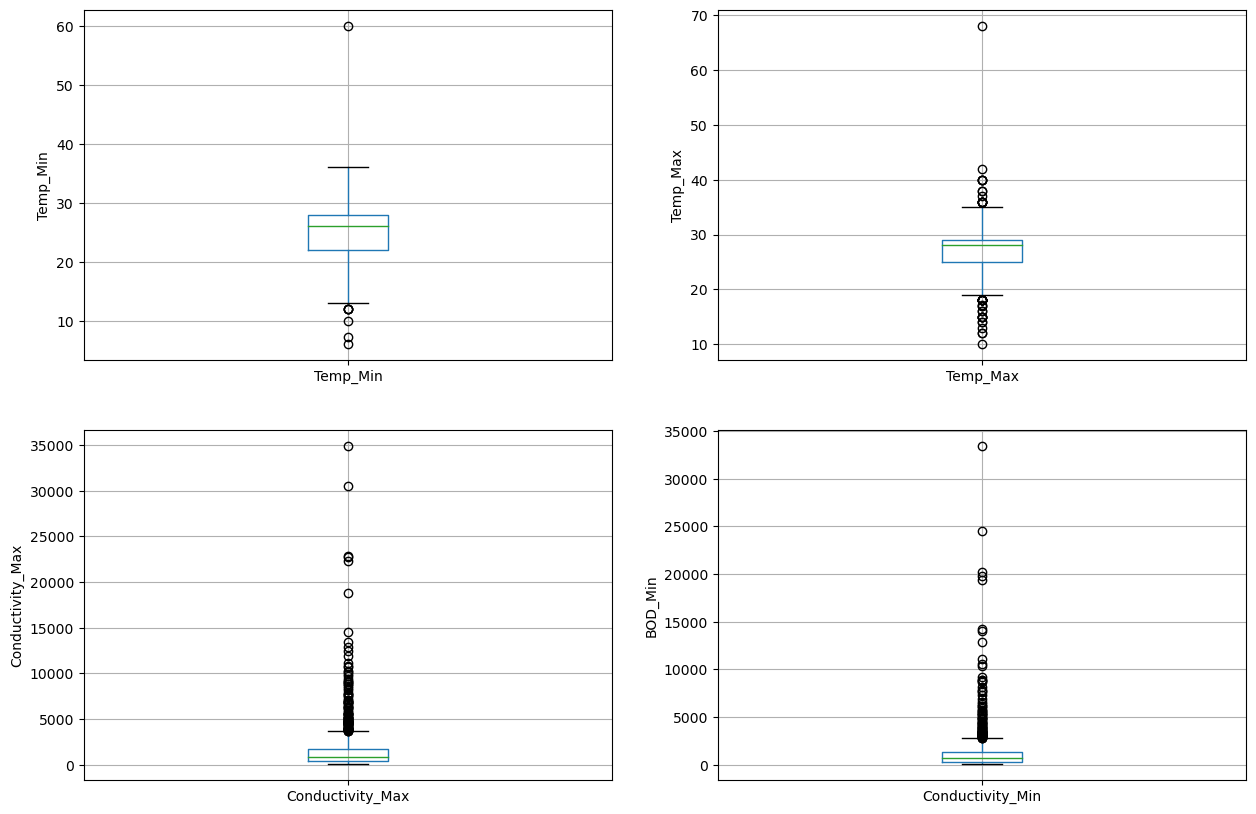

In [31]:
# Plot the different attributes to look for outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')
plt.show()

In [32]:
# find outliers for different  variables

lower_limit=df.Temp_Max.mean()- 9*df.Temp_Max.std()
upper_limit=df.Temp_Max.mean()+ 9*df.Temp_Max.std()

In [33]:
# drop the rows containing values outside the cap
df.loc[df['Temp_Max']>upper_limit,'Temp_Max']=upper_limit
df.loc[df['Temp_Max']<lower_limit,'Temp_Max']=lower_limit

In [34]:

lower_limit=df.Conductivity_Min.mean()- 9*df.Conductivity_Min.std()
upper_limit=df.Conductivity_Min.mean()+ 9*df.Conductivity_Min.std()

In [35]:
df.loc[df['Conductivity_Min']>upper_limit,'Conductivity_Min']=upper_limit
df.loc[df['Conductivity_Min']<lower_limit,'Conductivity_Min']=lower_limit

In [36]:

lower_limit=df.Conductivity_Max.mean()- 9*df.Conductivity_Max.std()
upper_limit=df.Conductivity_Max.mean()+ 9*df.Conductivity_Max.std()

In [37]:
df.loc[df['Conductivity_Max']>upper_limit,'Conductivity_Max']=upper_limit
df.loc[df['Conductivity_Max']<lower_limit,'Conductivity_Max']=lower_limit

df2

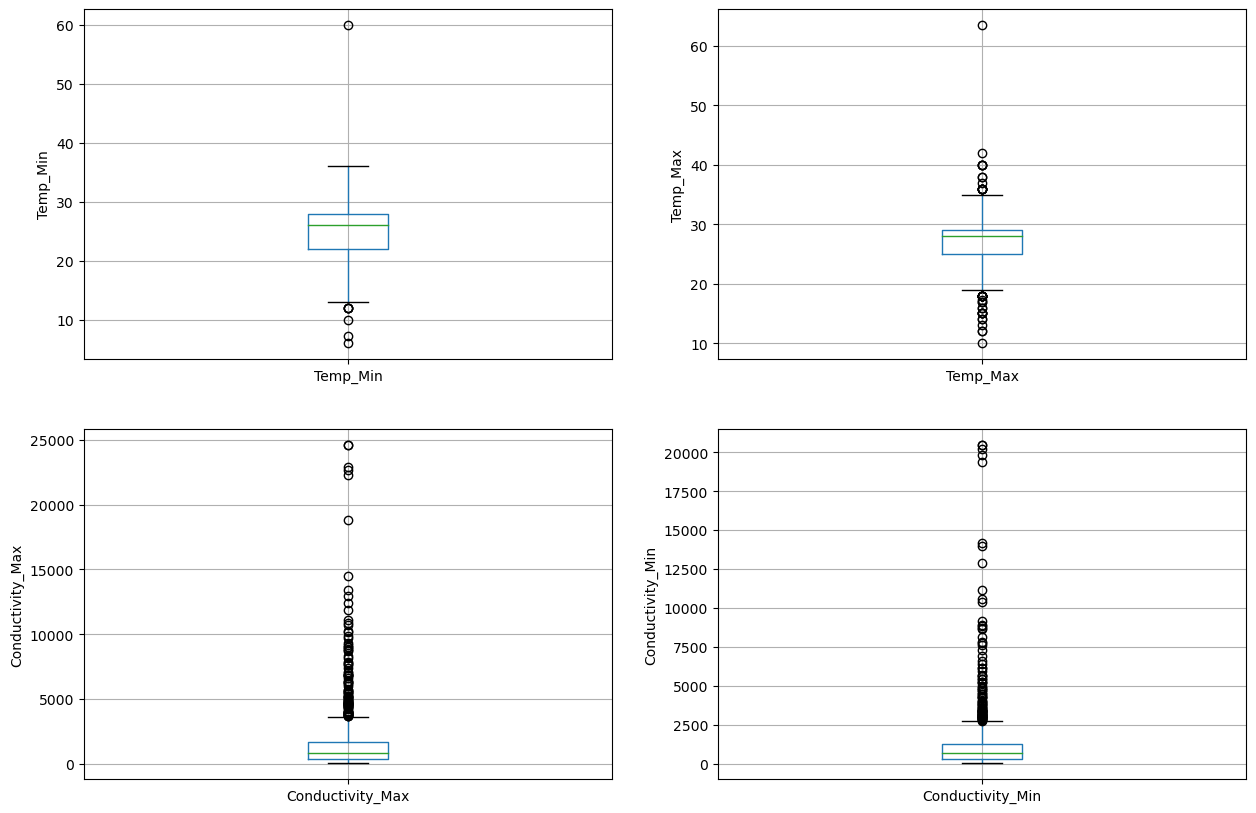

In [38]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('Conductivity_Min')
plt.show()

In [39]:
pd.set_option('display.max_columns', None)
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,25.037355,27.127253,7.098213,7.612887,1190.675277,1547.560882,0.871403,0.995532,2.044272,3.723374,26.536014,33.868901,59.291957,98.690259,782.081189,996.623727,1.154307,1.527431,0.001317,0.001423,0.056300,0.142091,0.159071,0.003575,0.065237,0.016086,0.015192,0.007149,0.008937,0.073280,0.016086,0.184987,0.252011,16.549598
std,4.058922,4.001827,2.011033,4.037174,1955.536122,2398.484219,8.109076,8.268724,3.515039,13.218285,160.092927,187.207863,259.600340,407.373775,1320.638468,1621.683944,25.110414,33.118338,0.003723,0.004149,0.230604,0.349300,0.365905,0.059708,0.247054,0.125862,0.122371,0.084288,0.094152,0.260712,0.125862,0.388460,0.434362,9.762153
min,6.000000,10.000000,-7.780000,-8.330000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.890000,7.190000,296.500000,360.500000,0.000000,0.000000,0.440000,0.700000,0.000000,0.000000,0.000000,0.000000,222.000000,294.500000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.050000,7.500000,7.810000,1282.500000,1690.000000,1.200000,1.200000,2.080000,3.995000,3.700000,5.500000,16.000000,23.000000,842.000000,1068.000000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,32.650000,97.390000,20458.317436,24591.063312,269.000000,269.000000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


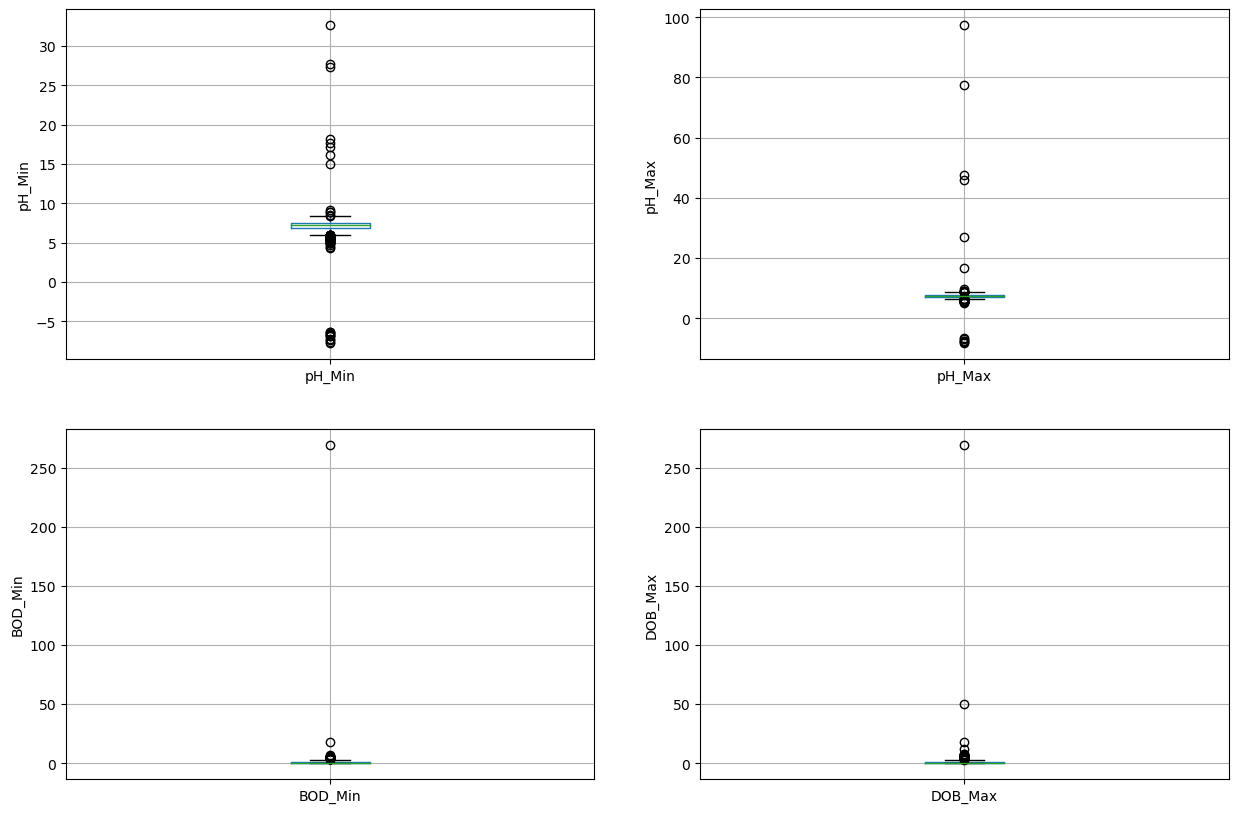

In [40]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [41]:
q1=df.pH_Max.quantile(0.25)
q3=df.pH_Max.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [42]:
df.loc[df['pH_Max']>upper_limit,'pH_Max']=upper_limit
df.loc[df['pH_Max']<lower_limit,'pH_Max']=lower_limit

In [43]:
q1=df.pH_Min.quantile(0.25)
q3=df.pH_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [44]:
df.loc[df['pH_Min']>upper_limit,'pH_Min']=upper_limit
df.loc[df['pH_Min']<lower_limit,'pH_Min']=lower_limit

In [45]:

lower_limit=df.BOD_Min.mean()- 2*df.BOD_Min.std()
upper_limit=df.BOD_Min.mean()+ 10*df.BOD_Min.std()

In [46]:
df.loc[df['BOD_Min']>upper_limit,'BOD_Min']=upper_limit
df.loc[df['BOD_Min']<lower_limit,'BOD_Min']=lower_limit

In [47]:

lower_limit=df.DOB_Max.mean()- 1*df.DOB_Max.std()
upper_limit=df.DOB_Max.mean()+ 30*df.DOB_Max.std()

In [48]:
df.loc[df['DOB_Max']>upper_limit,'DOB_Max']=upper_limit
df.loc[df['DOB_Max']<lower_limit,'DOB_Max']=lower_limit

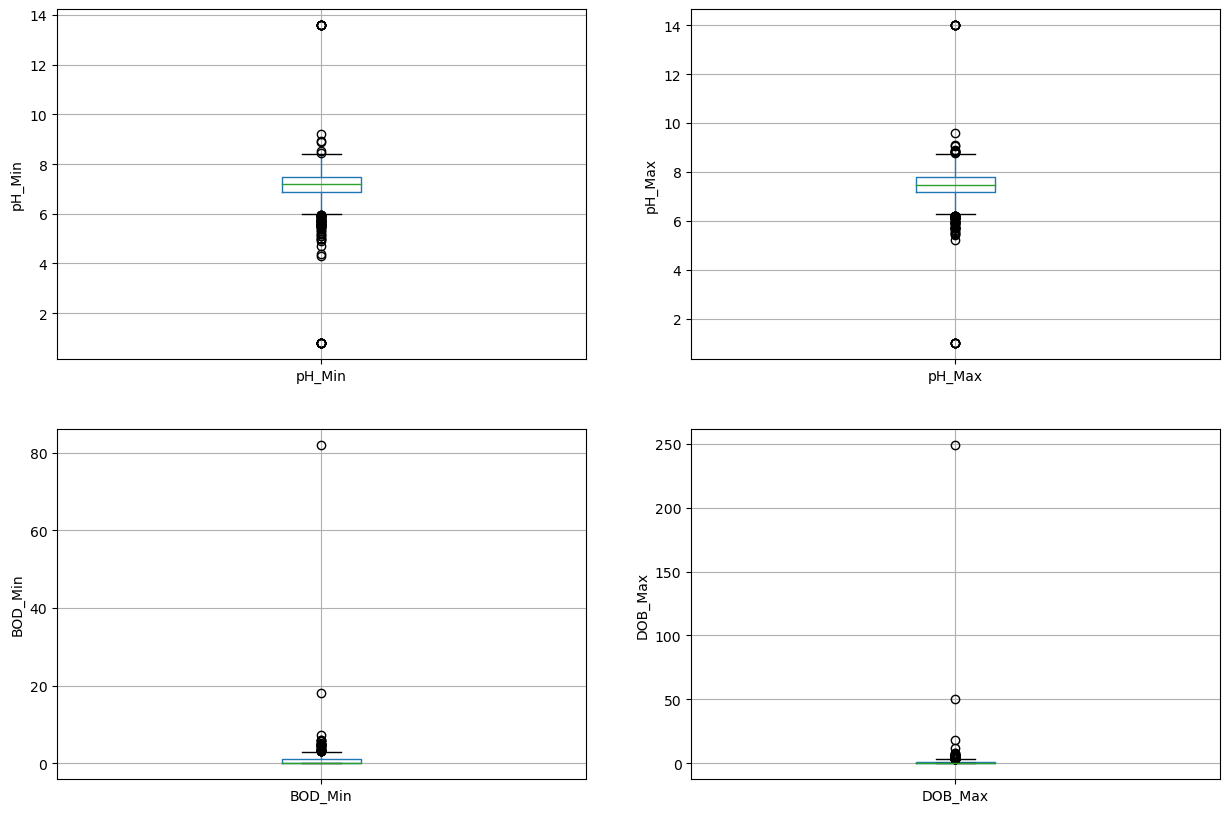

In [49]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [50]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,25.037355,27.127253,7.117757,7.454334,1190.675277,1547.560882,0.704256,0.977710,2.044272,3.723374,26.536014,33.868901,59.291957,98.690259,782.081189,996.623727,1.154307,1.527431,0.001317,0.001423,0.056300,0.142091,0.159071,0.003575,0.065237,0.016086,0.015192,0.007149,0.008937,0.073280,0.016086,0.184987,0.252011,16.549598
std,4.058922,4.001827,1.018698,0.885957,1955.536122,2398.484219,2.702935,7.691942,3.515039,13.218285,160.092927,187.207863,259.600340,407.373775,1320.638468,1621.683944,25.110414,33.118338,0.003723,0.004149,0.230604,0.349300,0.365905,0.059708,0.247054,0.125862,0.122371,0.084288,0.094152,0.260712,0.125862,0.388460,0.434362,9.762153
min,6.000000,10.000000,0.790000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.890000,7.190000,296.500000,360.500000,0.000000,0.000000,0.440000,0.700000,0.000000,0.000000,0.000000,0.000000,222.000000,294.500000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.050000,7.500000,7.810000,1282.500000,1690.000000,1.200000,1.200000,2.080000,3.995000,3.700000,5.500000,16.000000,23.000000,842.000000,1068.000000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,13.600000,14.010000,20458.317436,24591.063312,81.962159,249.057266,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


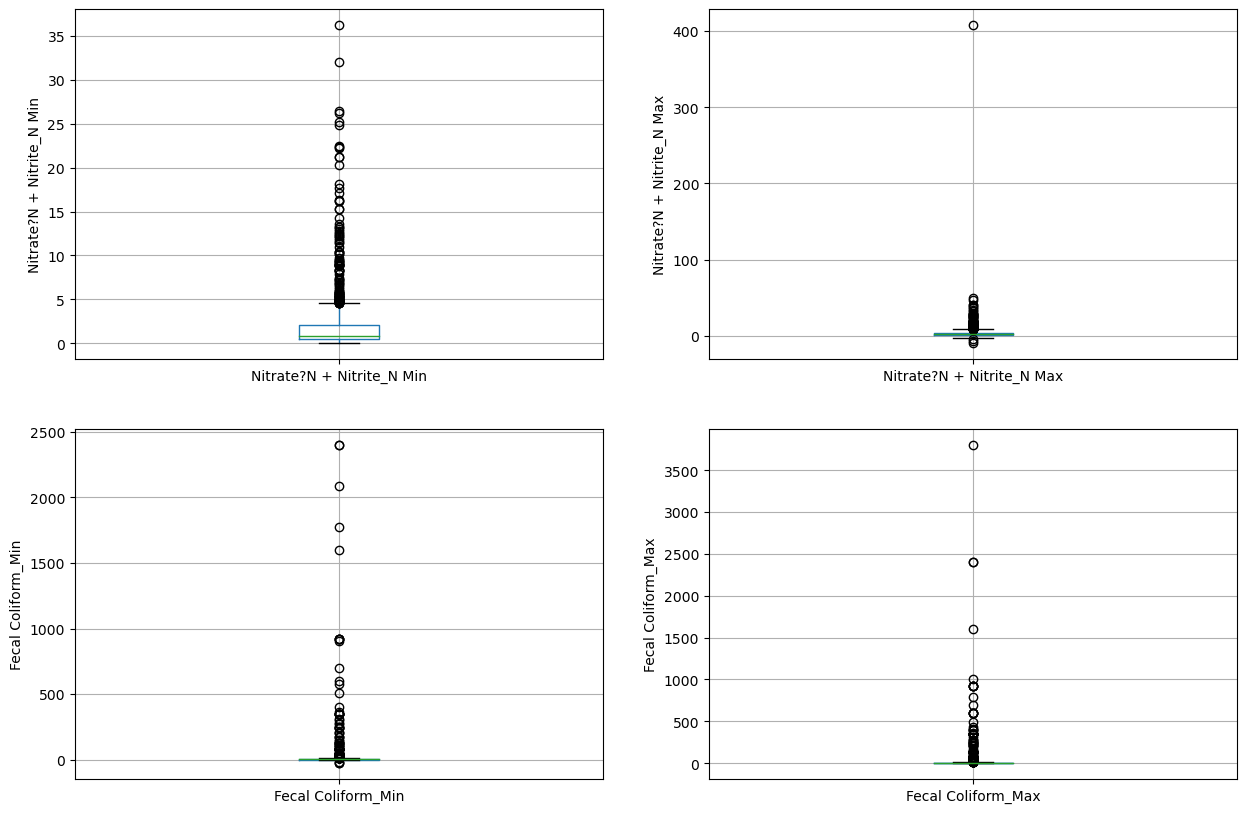

In [51]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

In [52]:
q1=df['Nitrate?N + Nitrite_N Max'].quantile(0.25)
q3=df['Nitrate?N + Nitrite_N Max'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Nitrate?N + Nitrite_N Max'].mean()- 2*df['Nitrate?N + Nitrite_N Max'].std()
upper_limit=df['Nitrate?N + Nitrite_N Max'].mean()+ 10*df['Nitrate?N + Nitrite_N Max'].std()

In [53]:
df.loc[df['Nitrate?N + Nitrite_N Max']>upper_limit,'Nitrate?N + Nitrite_N Max']=upper_limit
df.loc[df['Nitrate?N + Nitrite_N Max']<lower_limit,'Nitrate?N + Nitrite_N Max']=lower_limit

In [54]:

lower_limit=df['Total Coliform_Max'].mean()- 2*df['Total Coliform_Max'].std()
upper_limit=df['Total Coliform_Max'].mean()+ 15*df['Total Coliform_Max'].std()

In [55]:
df.loc[df['Total Coliform_Max']>upper_limit,'Total Coliform_Max']=upper_limit
df.loc[df['Total Coliform_Max']<lower_limit,'Total Coliform_Max']=lower_limit

In [56]:

lower_limit=df['Fecal Coliform_Max'].mean()- 2*df['Fecal Coliform_Max'].std()
upper_limit=df['Fecal Coliform_Max'].mean()+ 30*df['Fecal Coliform_Max'].std()

In [57]:
df.loc[df['Fecal Coliform_Max']>upper_limit,'Fecal Coliform_Max']=upper_limit
df.loc[df['Fecal Coliform_Max']<lower_limit,'Fecal Coliform_Max']=lower_limit

In [58]:
q1=df['Fecal Coliform_Min'].quantile(0.25)
q3=df['Fecal Coliform_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Fecal Coliform_Min'].mean()- 2*df['Fecal Coliform_Min'].std()
upper_limit=df['Fecal Coliform_Min'].mean()+ 100*df['Fecal Coliform_Min'].std()

In [59]:
df.loc[df['Fecal Coliform_Min']>upper_limit,'Fecal Coliform_Min']=upper_limit
df.loc[df['Fecal Coliform_Min']<lower_limit,'Fecal Coliform_Min']=lower_limit

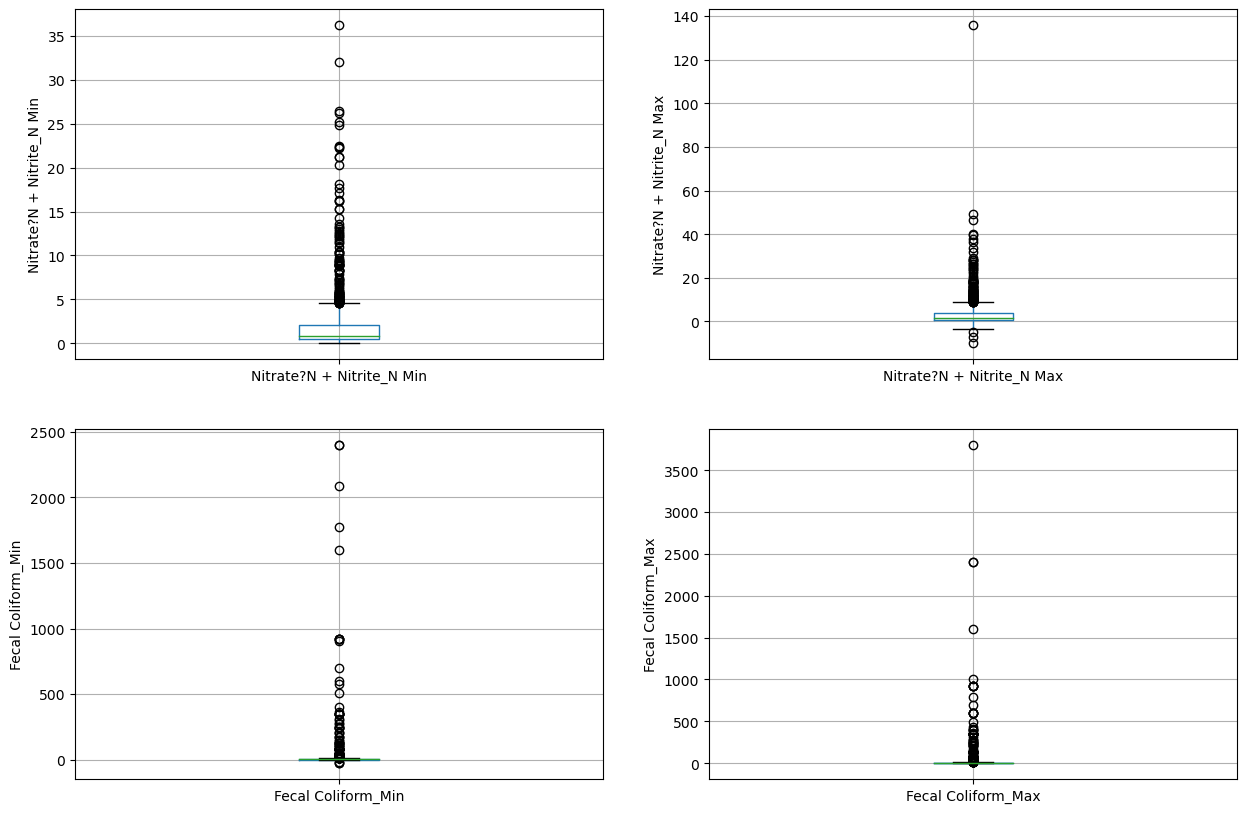

In [60]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

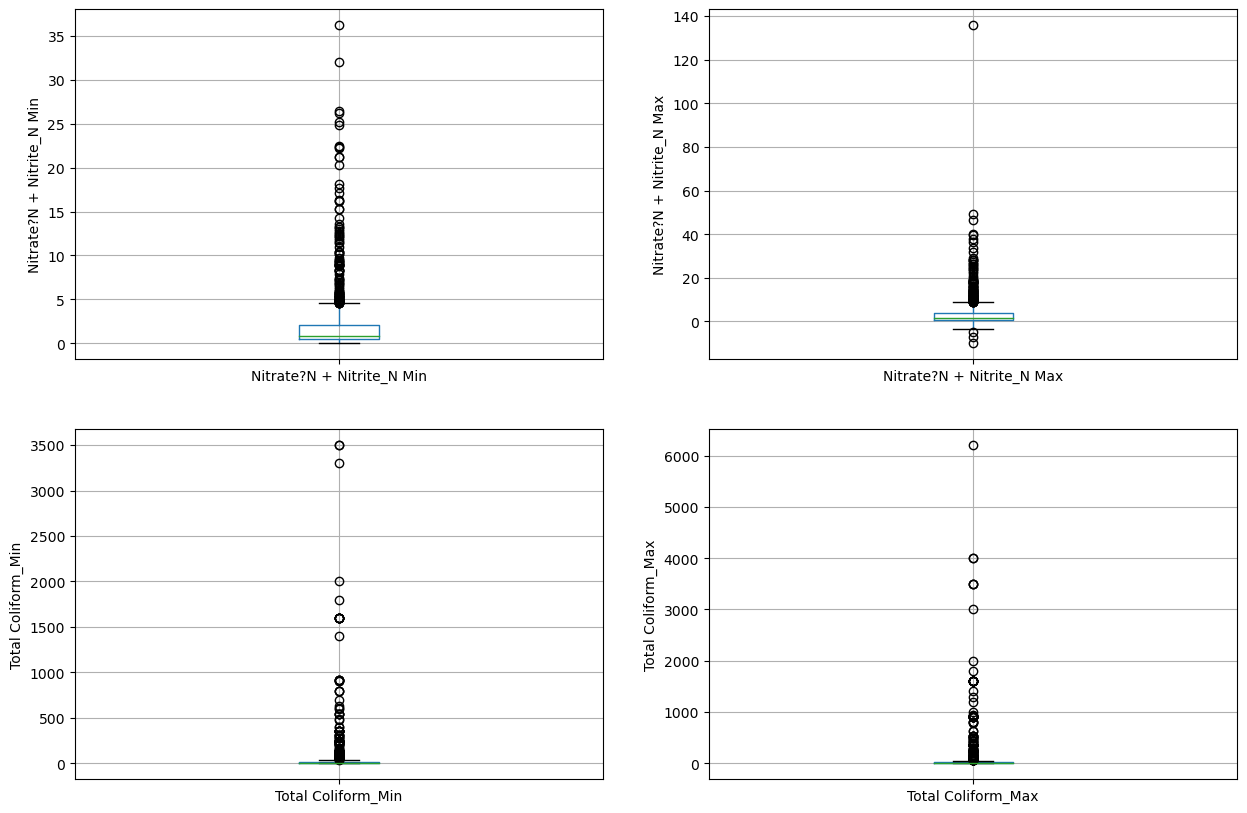

In [61]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Total Coliform_Min')
fig.set_title('')
fig.set_ylabel('Total Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Total Coliform_Max')
fig.set_title('')
fig.set_ylabel('Total Coliform_Max')
plt.show()

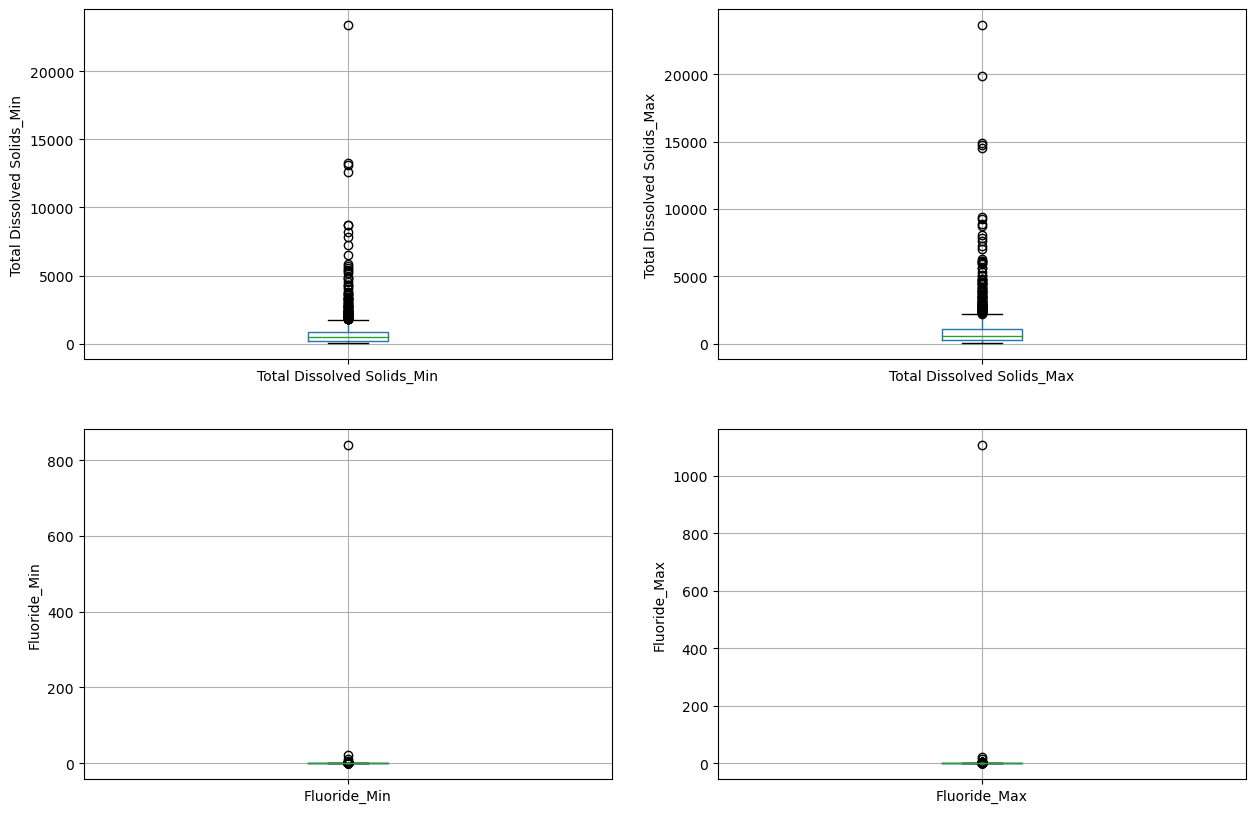

In [62]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Total Dissolved Solids_Min')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Total Dissolved Solids_Max')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [63]:
q1=df['Fluoride_Min'].quantile(0.25)
q3=df['Fluoride_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 20*IQR

In [64]:
df.loc[df['Fluoride_Min']>upper_limit,'Fluoride_Min']=upper_limit
df.loc[df['Fluoride_Min']<lower_limit,'Fluoride_Min']=lower_limit

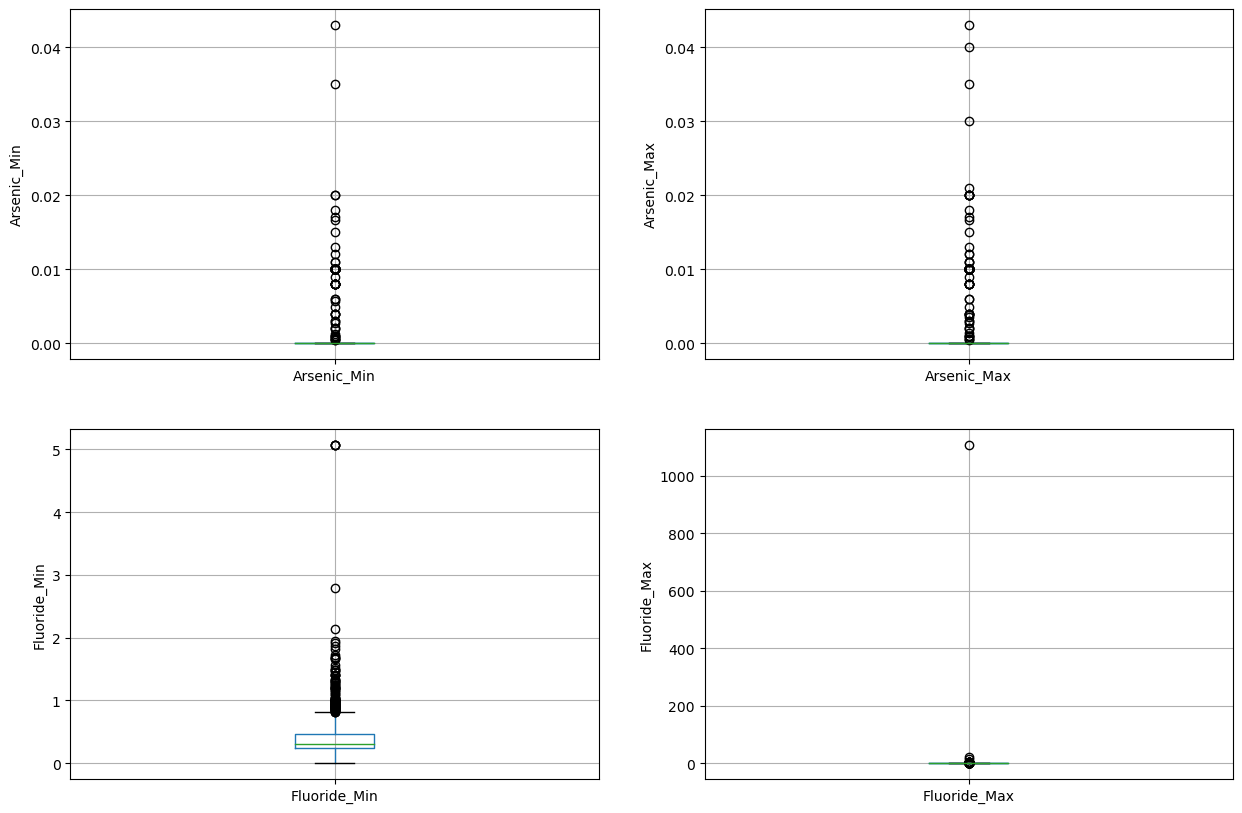

In [65]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Arsenic_Min')
fig.set_title('')
fig.set_ylabel('Arsenic_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Arsenic_Max')
fig.set_title('')
fig.set_ylabel('Arsenic_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [66]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,25.037355,27.127253,7.117757,7.454334,1190.675277,1547.560882,0.704256,0.977710,2.044272,3.480216,26.536014,33.868901,59.291957,97.983643,782.081189,996.623727,0.389643,1.527431,0.001317,0.001423,0.056300,0.142091,0.159071,0.003575,0.065237,0.016086,0.015192,0.007149,0.008937,0.073280,0.016086,0.184987,0.252011,16.549598
std,4.058922,4.001827,1.018698,0.885957,1955.536122,2398.484219,2.702935,7.691942,3.515039,6.640995,160.092927,187.207863,259.600340,395.916964,1320.638468,1621.683944,0.430193,33.118338,0.003723,0.004149,0.230604,0.349300,0.365905,0.059708,0.247054,0.125862,0.122371,0.084288,0.094152,0.260712,0.125862,0.388460,0.434362,9.762153
min,6.000000,10.000000,0.790000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.890000,7.190000,296.500000,360.500000,0.000000,0.000000,0.440000,0.700000,0.000000,0.000000,0.000000,0.000000,222.000000,294.500000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.050000,7.500000,7.810000,1282.500000,1690.000000,1.200000,1.200000,2.080000,3.995000,3.700000,5.500000,16.000000,23.000000,842.000000,1068.000000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,13.600000,14.010000,20458.317436,24591.063312,81.962159,249.057266,36.240000,135.906228,2400.000000,3800.000000,3500.000000,6209.296877,23400.000000,23660.000000,5.070000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [67]:
import seaborn as sns

In [68]:
df.shape


(1119, 35)

In [69]:
lb=LabelEncoder()
df['DrinkabilityN']=lb.fit_transform(df['Drinkability'])

df1['DrinkabilityN']=lb.fit_transform(df1['Drinkability'])

df.drop(columns=['Drinkability'],axis=1,inplace=True)

df1.drop(columns=['Drinkability'],axis=1,inplace=True)

In [70]:

df2=df['DrinkabilityN']
df3=df1['DrinkabilityN']
df.drop(columns=['DrinkabilityN'],axis=1,inplace=True)
df1.drop(columns=['DrinkabilityN'],axis=1,inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df2.value_counts()

DrinkabilityN
1    612
0    507
Name: count, dtype: int64

In [73]:
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,25.037355,27.127253,7.117757,7.454334,1190.675277,1547.560882,0.704256,0.977710,2.044272,3.480216,26.536014,33.868901,59.291957,97.983643,782.081189,996.623727,0.389643,1.527431,0.001317,0.001423,0.056300,0.142091,0.159071,0.003575,0.065237,0.016086,0.015192,0.007149,0.008937,0.073280,0.016086,0.184987,0.252011,16.549598
std,4.058922,4.001827,1.018698,0.885957,1955.536122,2398.484219,2.702935,7.691942,3.515039,6.640995,160.092927,187.207863,259.600340,395.916964,1320.638468,1621.683944,0.430193,33.118338,0.003723,0.004149,0.230604,0.349300,0.365905,0.059708,0.247054,0.125862,0.122371,0.084288,0.094152,0.260712,0.125862,0.388460,0.434362,9.762153
min,6.000000,10.000000,0.790000,0.990000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.000000,6.890000,7.190000,296.500000,360.500000,0.000000,0.000000,0.440000,0.700000,0.000000,0.000000,0.000000,0.000000,222.000000,294.500000,0.240000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,28.000000,7.200000,7.470000,676.000000,870.500000,0.000000,0.000000,0.860000,1.595000,2.000000,2.000000,4.500000,8.000000,470.000000,578.000000,0.310000,0.415000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,28.000000,29.050000,7.500000,7.810000,1282.500000,1690.000000,1.200000,1.200000,2.080000,3.995000,3.700000,5.500000,16.000000,23.000000,842.000000,1068.000000,0.470000,0.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
max,60.000000,63.495937,13.600000,14.010000,20458.317436,24591.063312,81.962159,249.057266,36.240000,135.906228,2400.000000,3800.000000,3500.000000,6209.296877,23400.000000,23660.000000,5.070000,1108.000000,0.043000,0.043000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [74]:
x_train,x_test,y_train,y_test=train_test_split(df,df2,test_size=0.3)

x_train1,x_test1,y_train1,y_test1=train_test_split(df1,df3,test_size=0.3)

In [99]:
from sklearn.linear_model import LogisticRegression

In [123]:
model=LogisticRegression(max_iter=100000)

In [124]:
#DF where the outliers were removed
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [125]:
model.score(x_test1,y_test1)

0.9375

In [126]:
#DF where the outliers weren't removed

model.fit(x_train1,y_train1)

LogisticRegression(max_iter=100000)

In [127]:
model.score(x_test1,y_test1)

0.9285714285714286

In [128]:
from sklearn import tree

In [129]:
#DF where the outliers were removed

model=tree.DecisionTreeClassifier()

In [130]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
model.score(x_test1,y_test1)

0.9970238095238095

In [132]:
#DF where the outliers weren't removed 

model.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [133]:
model.score(x_test1,y_test1)

0.9910714285714286

In [139]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

In [140]:
#model.add(Input(X.shape))
model=Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))

model.add(Dense(1,activation='sigmoid'))

In [146]:
model.compile(optimizer='Adadelta',loss=BinaryCrossentropy(),metrics=['accuracy'])

In [147]:
model.fit(x_train,y_train,epochs=200,verbose=True)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9221
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9349
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9413
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9400
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9349
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9413
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.9336
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9259
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9361
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9246
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9413
Epoch 84/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9272
Epoch 85/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9400
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9361
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9566
Epoch 88/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9413
Epoch 89/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9310
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9310
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9272
Epoch 92/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9234
Epoch 93/200


25/25 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9234
Epoch 165/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2083 - accuracy: 0.9413
Epoch 166/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9195
Epoch 167/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9323
Epoch 168/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.9349
Epoch 169/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9310
Epoch 170/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.9374
Epoch 171/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9285
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9285
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9361
Epoc

In [151]:
model.evaluate(x_train,y_train)
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9524


[0.2211364507675171, 0.9523809552192688]

In [149]:
model.fit(x_train1,y_train1,epochs=200,verbose=True)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1369 - accuracy: 0.9681
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9438
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9617
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9617
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9630
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9591
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9591
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9617
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9668
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9464
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9604
Epoch 84/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9579
Epoch 85/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9413
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9336
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9553
Epoch 88/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9502
Epoch 89/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9374
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9591
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9336
Epoch 92/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9617
Epoch 93/200


25/25 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9566
Epoch 165/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9374
Epoch 166/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9515
Epoch 167/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9527
Epoch 168/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9617
Epoch 169/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9400
Epoch 170/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9502
Epoch 171/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9579
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9502
Epoch 173/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9464
Epoc

In [150]:
model.evaluate(x_train1,y_train1)
model.evaluate(x_test1,y_test1)

11/11 [==============================] - 0s 869us/step - loss: 0.2694 - accuracy: 0.9315


[0.26937389373779297, 0.9315476417541504]